In [2]:
import pandas as pd

try:
    movies = pd.read_csv('tmdb_5000_movies.csv')
    credits = pd.read_csv('tmdb_5000_credits.csv')

    credits.rename(columns={'movie_id': 'id'}, inplace=True)
    df = pd.merge(movies, credits, on='id')

    print(f"الشكل الكلي للبيانات المدمجة: {df.shape}")
    display(df.head(3))

except FileNotFoundError:
    print("خطأ: لم يتم العثور على ملفات CSV. يرجى التأكد من رفع الملفات أولاً.")


الشكل الكلي للبيانات المدمجة: (4803, 23)


,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."


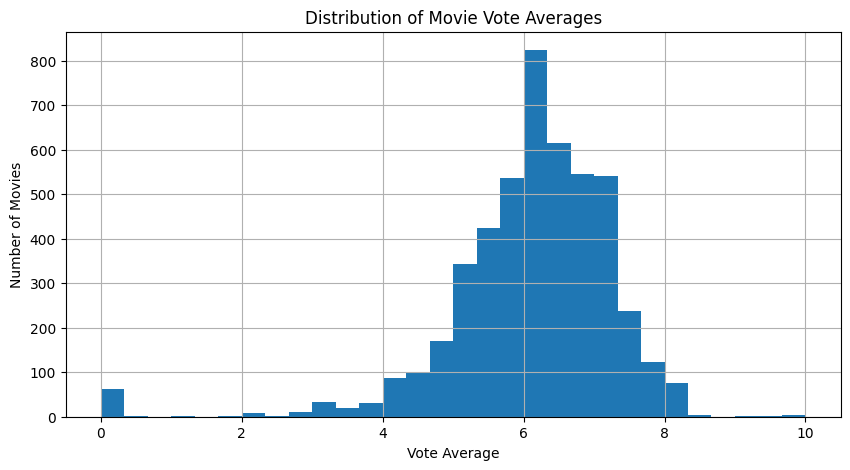

<Figure size 1000x500 with 0 Axes>

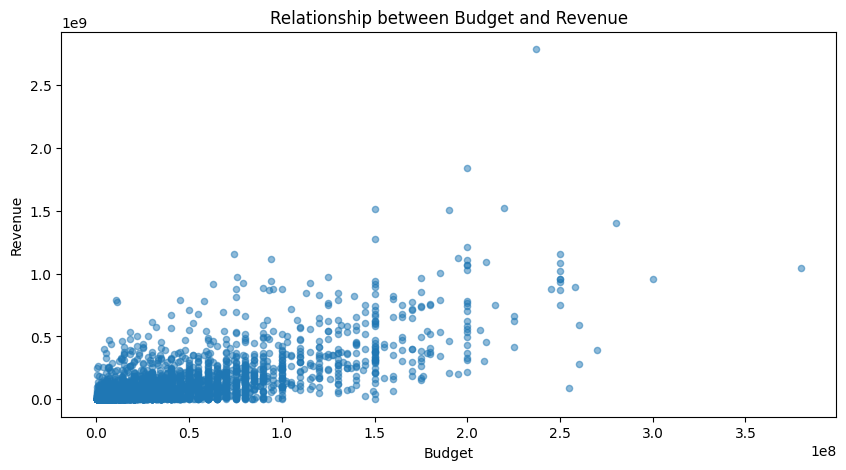

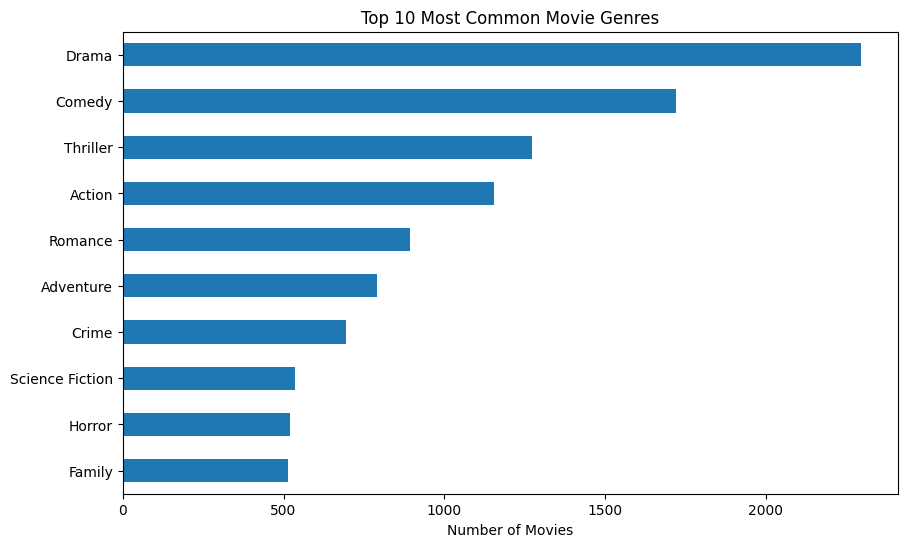

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import json

# 1. Distribution of Movie Ratings
plt.figure(figsize=(10, 5))
df['vote_average'].hist(bins=30)
plt.title('Distribution of Movie Vote Averages')
plt.xlabel('Vote Average')
plt.ylabel('Number of Movies')
plt.show()

# 2. Relationship between Budget and Revenue
plt.figure(figsize=(10, 5))
df[df['budget'] > 1000].plot(kind='scatter', x='budget', y='revenue', figsize=(10, 5), alpha=0.5)
plt.title('Relationship between Budget and Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

# 3. Top 10 Most Common Genres
all_genres = []
df['genres'].apply(lambda x: all_genres.extend([i['name'] for i in json.loads(x)]))

plt.figure(figsize=(10, 6))
pd.Series(all_genres).value_counts().head(10).plot(kind='barh')
plt.title('Top 10 Most Common Movie Genres')
plt.xlabel('Number of Movies')
plt.gca().invert_yaxis()
plt.show()


In [4]:
import json
import numpy as np

# 1. اختيار الأعمدة التي سنستخدمها
df_processed = df[[
    'id', 'budget', 'genres', 'keywords', 'overview', 'popularity',
    'production_companies', 'release_date', 'revenue', 'runtime',
    'cast', 'crew', 'vote_average', 'vote_count'
]].copy()

# 2. التعامل مع القيم المفقودة والبيانات غير المنطقية
df_processed = df_processed[(df_processed['budget'] > 1000) & (df_processed['revenue'] > 1000)]
df_processed = df_processed[df_processed['vote_count'] > 50]
df_processed['runtime'].fillna(df_processed['runtime'].mean(), inplace=True)

print(f"عدد الأفلام بعد التنظيف الأولي: {len(df_processed)}")

# 3. دوال مساعدة لتحويل بيانات JSON النصية
def parse_json_column(column_str, key_name, limit=None):
    """دالة عامة لاستخلاص قائمة من الأسماء من عمود JSON."""
    try:
        items = json.loads(column_str)
        names = [item[key_name] for item in items]
        names = [name.replace(" ", "") for name in names]
        if limit:
            return " ".join(names[:limit])
        return " ".join(names)
    except (json.JSONDecodeError, TypeError):
        return ""

def get_director(crew_str):
    """دالة خاصة لاستخلاص اسم المخرج."""
    try:
        crew = json.loads(crew_str)
        for member in crew:
            if member['job'] == 'Director':
                return member['name'].replace(" ", "")
        return ""
    except (json.JSONDecodeError, TypeError):
        return ""

# 4. تطبيق الدوال لاستخلاص السمات الجديدة
df_processed['genres_list'] = df_processed['genres'].apply(lambda x: parse_json_column(x, 'name'))
df_processed['keywords_list'] = df_processed['keywords'].apply(lambda x: parse_json_column(x, 'name'))
df_processed['main_actors'] = df_processed['cast'].apply(lambda x: parse_json_column(x, 'name', limit=3))
df_processed['director'] = df_processed['crew'].apply(get_director)

# 5. استخلاص السنة من تاريخ الإصدار
df_processed['release_year'] = pd.to_datetime(df_processed['release_date'], errors='coerce').dt.year

# 6. إنشاء جدول بيانات نهائي ونظيف (دمج السمات النصية في عمود 'tags')
df_processed['tags'] = df_processed['overview'].fillna('') + ' ' + \
                       df_processed['genres_list'] + ' ' + \
                       df_processed['keywords_list'] + ' ' + \
                       df_processed['main_actors'] + ' ' + \
                       df_processed['director']

# اختيار الأعمدة النهائية التي سنستخدمها
final_features = [
    'budget',
    'popularity',
    'revenue',
    'runtime',
    'release_year',
    'tags', # العمود النصي المدمج
    'vote_average' # الهدف
]

df_final = df_processed[final_features].dropna().reset_index(drop=True)

print(f"الشكل النهائي للبيانات الجاهزة للنموذج: {df_final.shape}")


/tmp/ipython-input-2998325396.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed['runtime'].fillna(df_processed['runtime'].mean(), inplace=True)


عدد الأفلام بعد التنظيف الأولي: 2944
الشكل النهائي للبيانات الجاهزة للنموذج: (2944, 7)


In [5]:
#الجزء الثالث
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from scipy.sparse import hstack
import numpy as np

vectorizer = CountVectorizer(max_features=5000, stop_words='english')
text_features = vectorizer.fit_transform(df_final['tags'])

y = df_final['vote_average']
numeric_features = df_final[['budget', 'popularity', 'revenue', 'runtime', 'release_year']]
X = hstack([numeric_features, text_features])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)


RandomForestRegressor(n_jobs=-1, random_state=42)

In [6]:
#خلية اختبار  النموذج
from sklearn.metrics import mean_absolute_error
import pandas as pd
import numpy as np

print("--- بدء الجزء الرابع: تقييم النموذج والتنبؤ ---")

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print(f"\n--- مقاييس أداء النموذج ---")
print(f"متوسط الخطأ المطلق (MAE): {mae:.2f}")

comparison_df = pd.DataFrame({'التقييم الحقيقي': y_test, 'التقييم المتوقع': predictions})

def predict_movie_rating(movie_index):
    """
    دالة تأخذ رقم الفيلم في مجموعة البيانات النهائية (df_final)،
    وتعرض تقييمه الحقيقي والتقييم الذي يتنبأ به النموذج.
    """
    try:
        movie_data = df_final.iloc[movie_index]
        numeric_part_df = movie_data[['budget', 'popularity', 'revenue', 'runtime', 'release_year']]
        numeric_part = numeric_part_df.values.astype(np.float64).reshape(1, -1)
        text_part = vectorizer.transform([movie_data['tags']])
        full_features = hstack([numeric_part, text_part])
        predicted_rating = model.predict(full_features)[0]

        print("\n-------------------------------------------")
        original_movie_info = df[df['id'] == df_processed.iloc[movie_index]['id']]
        print(f"اسم الفيلم: {original_movie_info['title_x'].values[0]}")
        print(f"التقييم الحقيقي: {movie_data['vote_average']:.1f}")
        print(f"التقييم الذي يتوقعه النموذج: {predicted_rating:.1f}")
        print("-------------------------------------------")

    except IndexError:
        print(f"خطأ: الرقم {movie_index} خارج نطاق البيانات. يرجى اختيار رقم بين 0 و {len(df_final)-1}.")
    except Exception as e:
        print(f"حدث خطأ غير متوقع: {e}")

predict_movie_rating(5)
predict_movie_rating(500)
predict_movie_rating(0)


--- بدء الجزء الرابع: تقييم النموذج والتنبؤ ---

--- مقاييس أداء النموذج ---
متوسط الخطأ المطلق (MAE): 0.42

-------------------------------------------
اسم الفيلم: Spider-Man 3
التقييم الحقيقي: 5.9
التقييم الذي يتوقعه النموذج: 6.2
-------------------------------------------

-------------------------------------------
اسم الفيلم: The Terminal
التقييم الحقيقي: 7.0
التقييم الذي يتوقعه النموذج: 7.0
-------------------------------------------

-------------------------------------------
اسم الفيلم: Avatar
التقييم الحقيقي: 7.2
التقييم الذي يتوقعه النموذج: 7.2
-------------------------------------------


In [7]:
#خلية للبحث بالفهرس
search_term = "Spider-Man 3"

found_movies = df[df['title_x'].str.contains(search_term, case=False, na=False)]

if not found_movies.empty:
    print(f"--- تم العثور على أفلام تطابق '{search_term}': ---")

    for movie_id in found_movies['id']:
        movie_in_processed = df_processed[df_processed['id'] == movie_id]

        if not movie_in_processed.empty:
            target_index = movie_in_processed.index[0]
            movie_title = found_movies[found_movies['id'] == movie_id]['title_x'].values[0]
            print(f" - فيلم: '{movie_title}' | رقم الفهرس للاستخدام في الدالة: {target_index}")
        else:
            movie_title = found_movies[found_movies['id'] == movie_id]['title_x'].values[0]
            print(f" - فيلم: '{movie_title}' (ملاحظة: تم استبعاد هذا الفيلم أثناء عملية التنظيف)")

else:
    print(f"لم يتم العثور على فيلم يطابق '{search_term}'.")


--- تم العثور على أفلام تطابق 'Spider-Man 3': ---
 - فيلم: 'Spider-Man 3' | رقم الفهرس للاستخدام في الدالة: 5


In [9]:
#خلية مقارنة بين الخورزميات
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error
import pandas as pd
import time

print("--- بدء الجزء الخامس: مقارنة أداء الخوارزميات ---")

results = []

print("\n1. جارٍ تدريب وتقييم نموذج Linear Regression...")
start_time = time.time()

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_mae = mean_absolute_error(y_test, lr_predictions)

end_time = time.time()
lr_time = end_time - start_time

results.append({
    'الخوارزمية': 'Linear Regression',
    'متوسط الخطأ المطلق (MAE)': lr_mae,
    'زمن التدريب (ثانية)': round(lr_time, 2)
})
print(f"اكتمل التقييم. MAE: {lr_mae:.2f}, الزمن: {lr_time:.2f} ثانية.")


print("\n2. إعادة تقييم نموذج Random Forest...")
rf_mae = mean_absolute_error(y_test, predictions)

results.append({
    'الخوارزمية': 'Random Forest',
    'متوسط الخطأ المطلق (MAE)': rf_mae,
    'زمن التدريب (ثانية)': 'N/A'
})
print(f"اكتمل التقييم. MAE: {rf_mae:.2f}")


print("\n3. جارٍ تدريب وتقييم نموذج XGBoost...")
start_time = time.time()

xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, n_jobs=-1)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_mae = mean_absolute_error(y_test, xgb_predictions)

end_time = time.time()
xgb_time = end_time - start_time

results.append({
    'الخوارزمية': 'XGBoost',
    'متوسط الخطأ المطلق (MAE)': xgb_mae,
    'زمن التدريب (ثانية)': round(xgb_time, 2)
})
print(f"اكتمل التقييم. MAE: {xgb_mae:.2f}, الزمن: {xgb_time:.2f} ثانية.")


print("\n\n--- جدول المقارنة النهائي لأداء الخوارزميات ---")
comparison_table = pd.DataFrame(results)
comparison_table = comparison_table.sort_values(by='متوسط الخطأ المطلق (MAE)')


--- بدء الجزء الخامس: مقارنة أداء الخوارزميات ---

1. جارٍ تدريب وتقييم نموذج Linear Regression...
اكتمل التقييم. MAE: 0.60, الزمن: 0.01 ثانية.

2. إعادة تقييم نموذج Random Forest...
اكتمل التقييم. MAE: 0.42

3. جارٍ تدريب وتقييم نموذج XGBoost...
اكتمل التقييم. MAE: 0.41, الزمن: 6.92 ثانية.


--- جدول المقارنة النهائي لأداء الخوارزميات ---
